# Part 1 – Task 1: Naive Bayes Theory

**1. What is the core assumption of Naive Bayes?**  
The core assumption of Naive Bayes is that all features are conditionally independent of each other given the class label.

**2. Differentiate between GaussianNB, MultinomialNB, and BernoulliNB.**  
GaussianNB assumes features follow a normal distribution (used for continuous data).  
MultinomialNB is designed for count-based features like word frequencies.  
BernoulliNB works with binary or boolean features indicating presence or absence.

**3. Why is Naive Bayes considered suitable for high-dimensional data?**  
Naive Bayes is suitable for high-dimensional data because it simplifies computations using the independence assumption, requires fewer parameters, and avoids overfitting even with a large number of features.

# Task 2: SMS Spam Classification using Naive Bayes

                                                 sms  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None
Accuracy: 98.51%
Precision: 0.93
Recall: 0.96
Confusion Matrix:
[[1431   16]
 [   9  217]]


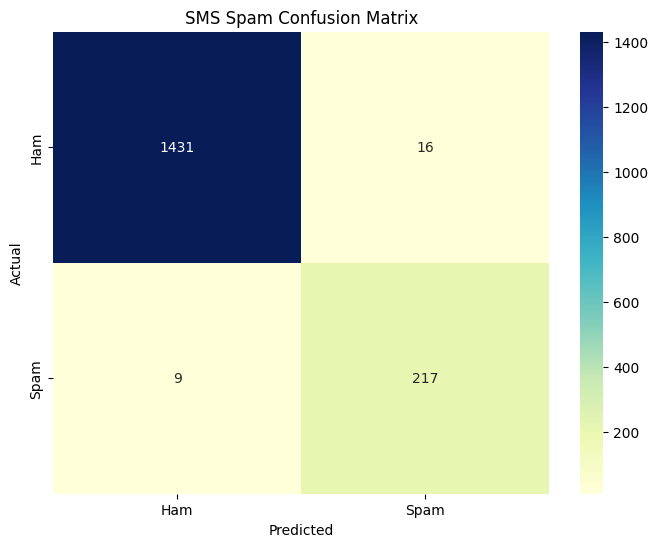

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load dataset
sms_df = pd.read_csv('./train.csv')
print(sms_df.head())
print(sms_df.info())

# Text vectorization using CountVectorizer
text_vectorizer = CountVectorizer()
features = text_vectorizer.fit_transform(sms_df['sms'])
labels = sms_df['label']

# Split the dataset
X_train_sms, X_test_sms, y_train_sms, y_test_sms = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train Naive Bayes model
naive_model = MultinomialNB()
naive_model.fit(X_train_sms, y_train_sms)

# Predictions and Evaluation
predictions_sms = naive_model.predict(X_test_sms)
acc_sms = accuracy_score(y_test_sms, predictions_sms)
prec_sms = precision_score(y_test_sms, predictions_sms)
rec_sms = recall_score(y_test_sms, predictions_sms)
conf_mat_sms = confusion_matrix(y_test_sms, predictions_sms)

print(f'Accuracy: {acc_sms*100:.2f}%')
print(f'Precision: {prec_sms:.2f}')
print(f'Recall: {rec_sms:.2f}')
print('Confusion Matrix:')
print(conf_mat_sms)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_sms, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SMS Spam Confusion Matrix')
plt.show()


# Task 3: Iris Dataset - Comparing Classifiers

In [2]:

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load data
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

# Split
X_iris = iris_df.drop(columns='target')
y_iris = iris_df['target']
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train_iris, y_train_iris)
gnb_pred = gnb_model.predict(X_test_iris)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(X_train_iris, y_train_iris)
logreg_pred = logreg_model.predict(X_test_iris)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_iris, y_train_iris)
tree_pred = tree_model.predict(X_test_iris)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc*100:.2f}%")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print("Confusion Matrix:")
    print(cm)

evaluate_model("GaussianNB", y_test_iris, gnb_pred)
evaluate_model("Logistic Regression", y_test_iris, logreg_pred)
evaluate_model("Decision Tree", y_test_iris, tree_pred)



GaussianNB Results:
Accuracy: 97.78%
Precision: 0.98
Recall: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Logistic Regression Results:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Decision Tree Results:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Part 2 – Task 4: Decision Tree Concepts

**1. What is entropy and information gain?**  
Entropy measures the impurity or uncertainty in a dataset, while Information Gain quantifies the reduction in entropy achieved by splitting the dataset on a particular feature.

**2. Explain the difference between Gini Index and Entropy.**  
The Gini Index measures the probability of incorrectly classifying a randomly chosen element, while Entropy measures the level of disorder; Gini is faster to compute, whereas Entropy uses logarithmic calculations and can be more sensitive to changes in class distribution.

**3. How can a decision tree overfit? How can this be avoided?**  
A decision tree can overfit by growing too deep and capturing noise in the training data. This can be avoided by pruning, setting maximum depth or minimum samples per split, and using ensemble methods like Random Forest.

# Task 5: Decision Tree Classifier on Titanic Dataset

C:\Users\khush\AppData\Local\Temp\ipykernel_10304\3528350832.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\khush\AppData\Local\Temp\ipykernel_10304\3528350832.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

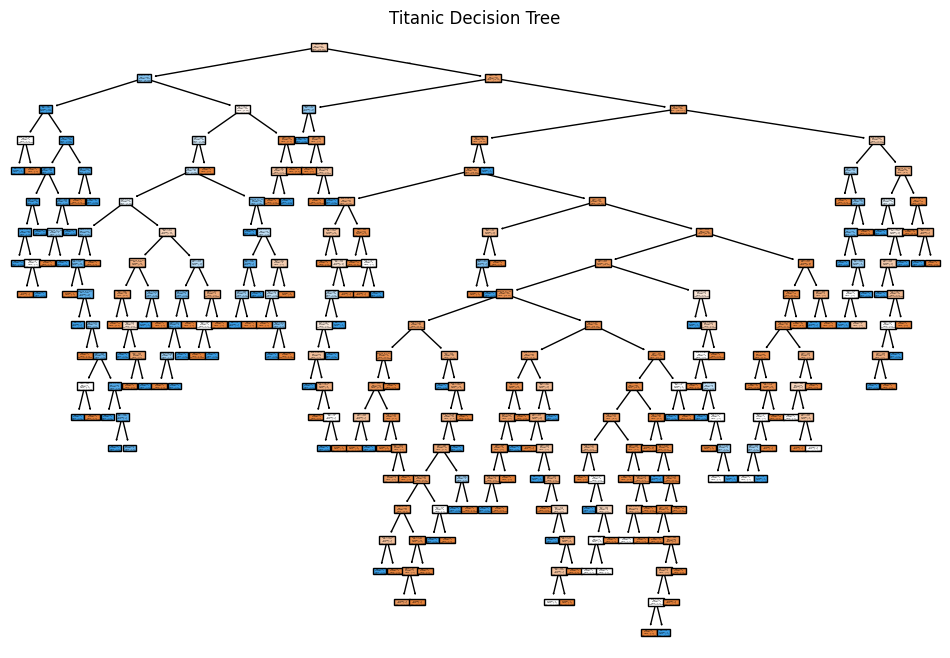

Accuracy: 74.63%
Confusion Matrix:
[[122  35]
 [ 33  78]]


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
titanic_data['Sex'] = encoder.fit_transform(titanic_data['Sex'])
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Select features
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X_titanic = titanic_data[feature_cols]
y_titanic = titanic_data['Survived']

# Train-test split
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=42)

# Train model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_titanic, y_train_titanic)

# Plot tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=feature_cols, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Titanic Decision Tree')
plt.show()

# Evaluate
y_pred_titanic = tree_clf.predict(X_test_titanic)
accuracy_titanic = accuracy_score(y_test_titanic, y_pred_titanic)
conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)

print(f'Accuracy: {accuracy_titanic*100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix_titanic)


# Task 6: Hyperparameter Tuning of Decision Tree

    max_depth  min_samples_split  train_accuracy  test_accuracy
0         NaN                  2        0.980738       0.746269
1         NaN                  5        0.939005       0.772388
2         NaN                 10        0.913323       0.787313
3         3.0                  2        0.831461       0.809701
4         3.0                  5        0.831461       0.809701
5         3.0                 10        0.831461       0.809701
6         5.0                  2        0.855538       0.794776
7         5.0                  5        0.850722       0.794776
8         5.0                 10        0.850722       0.794776
9        10.0                  2        0.939005       0.776119
10       10.0                  5        0.916533       0.787313
11       10.0                 10        0.903692       0.783582


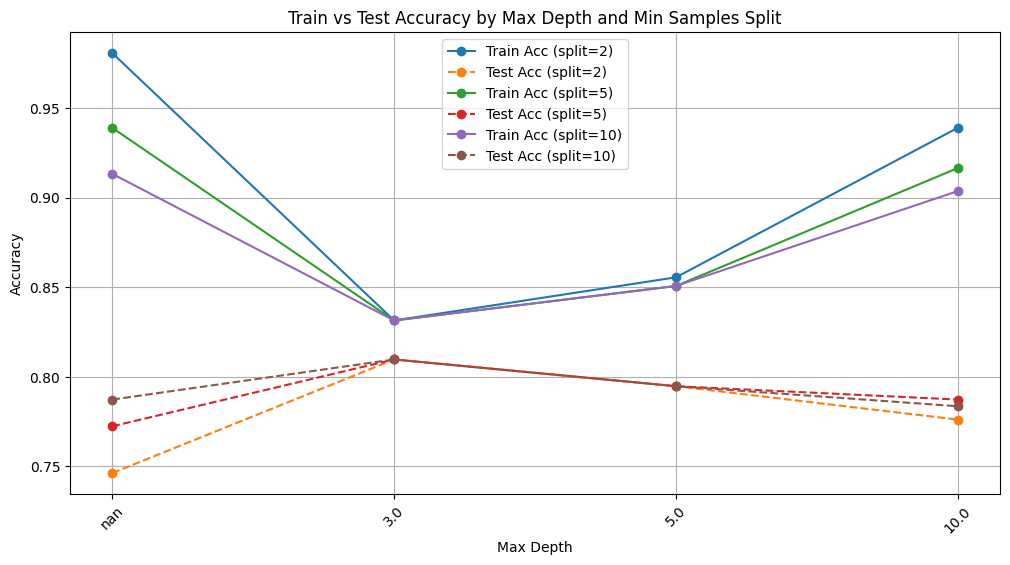

In [4]:

# Hyperparameter tuning
depth_options = [None, 3, 5, 10]
split_options = [2, 5, 10]
tuning_results = []

for d in depth_options:
    for s in split_options:
        clf = DecisionTreeClassifier(max_depth=d, min_samples_split=s, random_state=42)
        clf.fit(X_train_titanic, y_train_titanic)

        acc_train = accuracy_score(y_train_titanic, clf.predict(X_train_titanic))
        acc_test = accuracy_score(y_test_titanic, clf.predict(X_test_titanic))

        tuning_results.append({
            'max_depth': d,
            'min_samples_split': s,
            'train_accuracy': acc_train,
            'test_accuracy': acc_test
        })

results_df = pd.DataFrame(tuning_results)
print(results_df)

# Plotting
plt.figure(figsize=(12, 6))
for key, grp in results_df.groupby('min_samples_split'):
    plt.plot(grp['max_depth'].astype(str), grp['train_accuracy'], marker='o', label=f'Train Acc (split={key})')
    plt.plot(grp['max_depth'].astype(str), grp['test_accuracy'], marker='o', linestyle='--', label=f'Test Acc (split={key})')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy by Max Depth and Min Samples Split')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()


# Part 3 – Task 7: Bagging and Boosting Concepts

**1. What is the difference between Bagging and Boosting?**  
Bagging builds multiple independent models on different random subsets of data and averages their predictions to reduce variance, while Boosting builds models sequentially, where each model focuses on correcting the errors of the previous one to reduce bias.

**2. How does Random Forest reduce variance?**  
Random Forest reduces variance by training multiple decision trees on bootstrapped samples and averaging their predictions, which stabilizes the overall output and prevents overfitting.

**3. What is the weakness of boosting-based methods?**  
Boosting methods can overfit if there is noise in the data and usually take more time to train because they build models step by step.